In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
import warnings

warnings.filterwarnings('ignore')

# Import dataset

In [ ]:

from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

data = "/content/drive/MyDrive/DATA_1.csv"

df = pd.read_csv(data)


Mounted at /content/drive


# Exploratory data analysis

In [ ]:
df.shape

(2475, 7)

In [ ]:
df.head(10)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02,4357.701172,15900.0,15925.0,15400.0,15575.0,862800
1,2015-01-05,4248.073242,15500.0,16225.0,15325.0,15900.0,1814200
2,2015-01-06,3994.559570,14575.0,15250.0,14500.0,15200.0,3432100
3,2015-01-07,3960.300537,14450.0,14750.0,14275.0,14300.0,1596100
4,2015-01-08,3967.152100,14475.0,14625.0,14450.0,14575.0,874200
5,2015-01-09,4206.961914,15350.0,15350.0,14550.0,14550.0,2814200
6,2015-01-12,4008.262939,14625.0,15350.0,14600.0,15350.0,1862300
7,2015-01-13,3994.559570,14575.0,14725.0,14450.0,14500.0,1252500
8,2015-01-14,4104.187500,14975.0,15675.0,14775.0,14850.0,4737600
9,2015-01-15,4159.000488,15175.0,15475.0,15075.0,15175.0,1612600


In [ ]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

In [ ]:
# view column names again

df.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2475 non-null   object 
 1   Adj Close  2475 non-null   float64
 2   Close      2475 non-null   float64
 3   High       2475 non-null   float64
 4   Low        2475 non-null   float64
 5   Open       2475 non-null   float64
 6   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.5+ KB


In [ ]:
# check for missing values in variables

df.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
# view summary statistics in numerical variables

round(df.describe(),2)

,Adj Close,Close,High,Low,Open,Volume
count,2475.00,2475.00,2475.00,2475.00,2475.00,2475.00
mean,11107.39,19859.47,20177.22,19585.17,19881.46,2341541.09
std,8324.20,9032.51,9129.51,8933.46,9024.91,2352971.77
min,1449.50,4730.00,4815.00,4675.00,4700.00,0.00
25%,4716.77,12450.00,12750.00,12262.50,12500.00,1039400.00
50%,7613.27,19725.00,20050.00,19550.00,19750.00,1664000.00
75%,19416.31,26100.00,26437.50,25825.00,26125.00,2798650.00
max,31017.78,45350.00,45650.00,44775.00,45350.00,33955100.00


In [ ]:
!pip install pandas

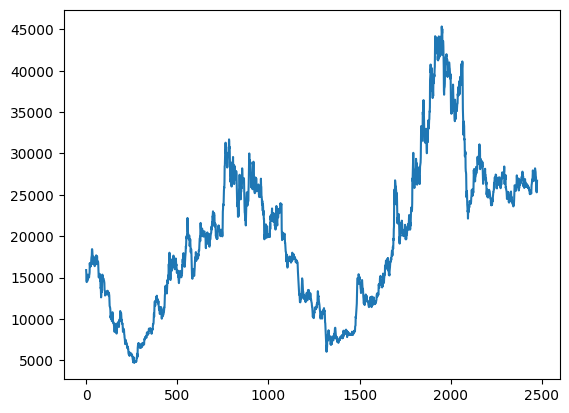

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data - replace 'your_file.csv' with your actual file
grafik = pd.read_csv(data)

# Now you can plot
grafik.Close.plot()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Misal target prediksi adalah harga penutupan (Close)
X = df[['Adj Close', 'High', 'Low', 'Open', 'Volume']]
y = df['Close']

# Split data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Menghitung return harian dalam persen
df['Return'] = df['Close'].pct_change() * 100

# Menghapus baris pertama (karena return pertama akan bernilai NaN)
df.dropna(inplace=True)

# Menampilkan data setelah ditambahkan kolom Return
df.head()


,Date,Adj Close,Close,High,Low,Open,Volume,Return
1,2015-01-05,4248.073242,15500.0,16225.0,15325.0,15900.0,1814200,-2.515723
2,2015-01-06,3994.559570,14575.0,15250.0,14500.0,15200.0,3432100,-5.967742
3,2015-01-07,3960.300537,14450.0,14750.0,14275.0,14300.0,1596100,-0.857633
4,2015-01-08,3967.152100,14475.0,14625.0,14450.0,14575.0,874200,0.173010
5,2015-01-09,4206.961914,15350.0,15350.0,14550.0,14550.0,2814200,6.044905


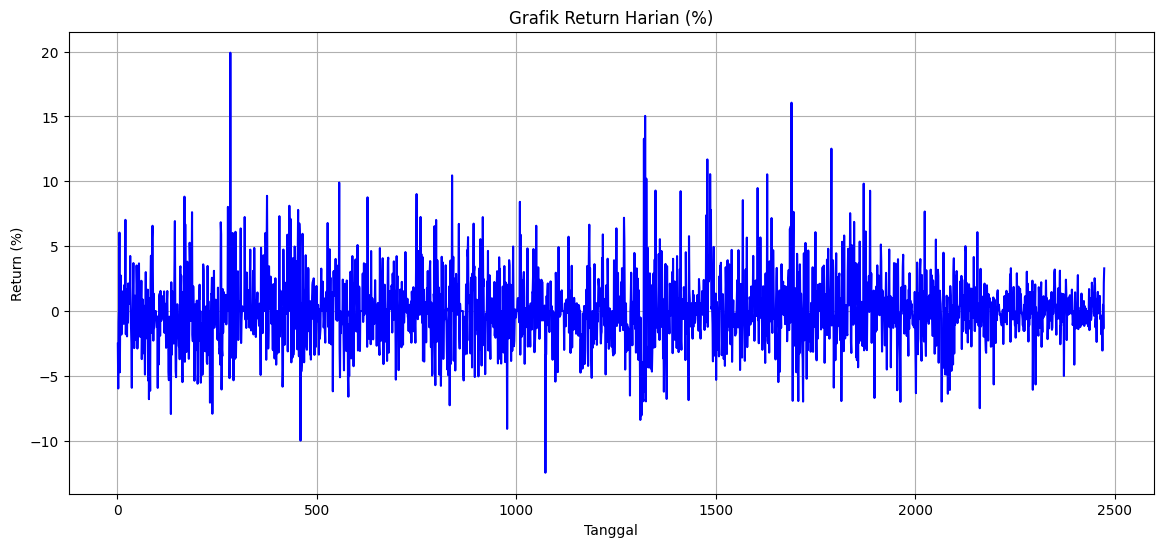

In [ ]:
import matplotlib.pyplot as plt

# Plot return harian
plt.figure(figsize=(14, 6))
df['Return'].plot(title='Grafik Return Harian (%)', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Return (%)')
plt.grid(True)
plt.show()


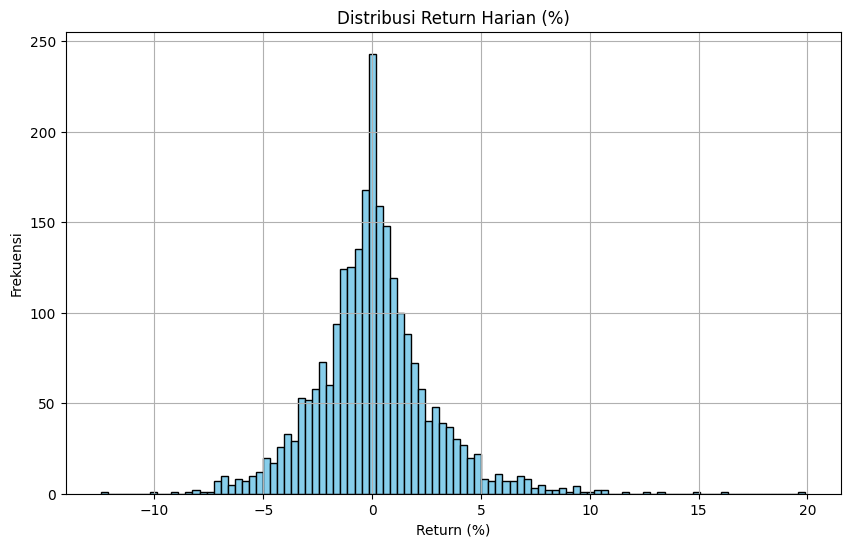

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Return'].hist(bins=100, color='skyblue', edgecolor='black')
plt.title('Distribusi Return Harian (%)')
plt.xlabel('Return (%)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()


Text(0, 0.5, 'Volume')

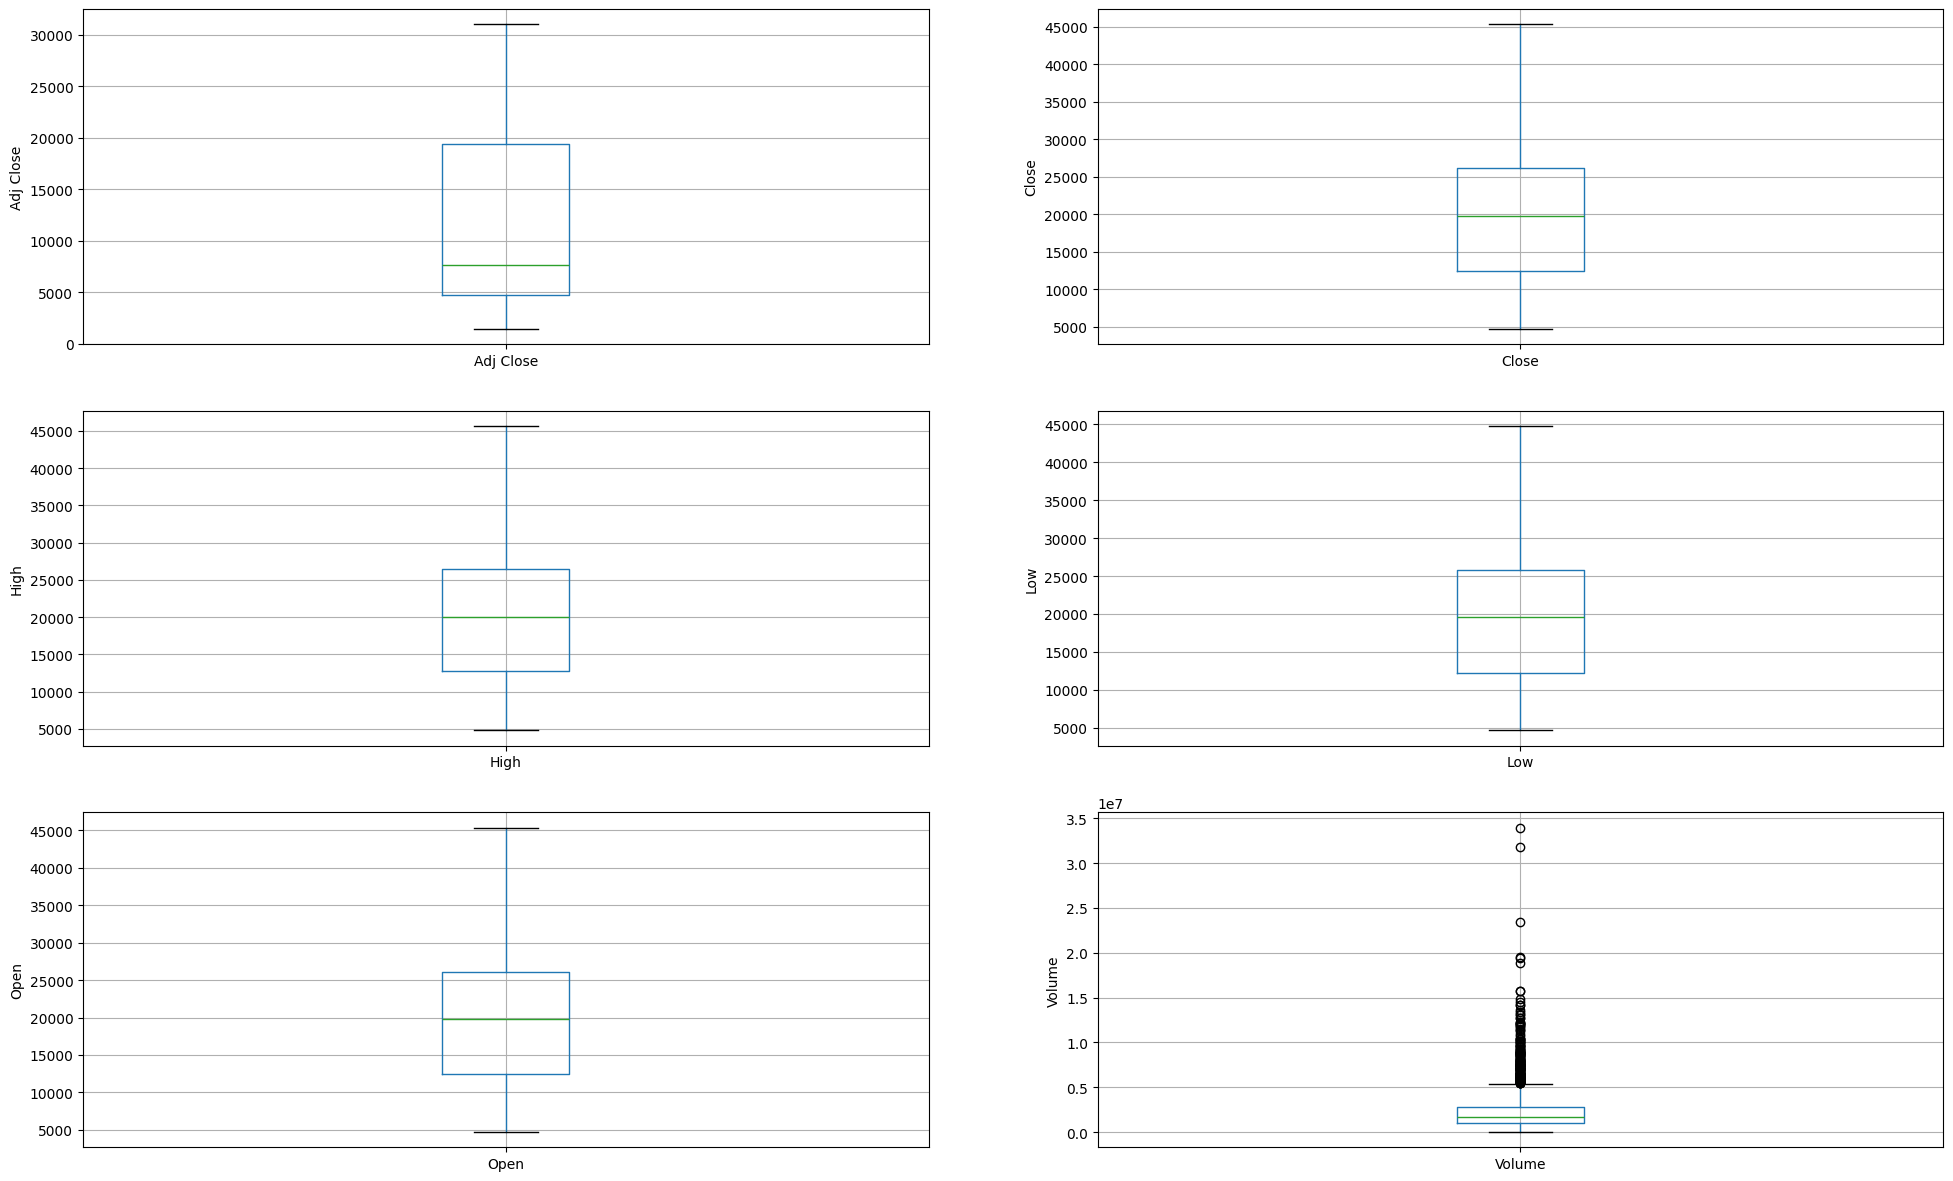

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='Adj Close')
fig.set_title('')
fig.set_ylabel('Adj Close')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='Close')
fig.set_title('')
fig.set_ylabel('Close')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='High')
fig.set_title('')
fig.set_ylabel('High')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='Low')
fig.set_title('')
fig.set_ylabel('Low')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='Open')
fig.set_title('')
fig.set_ylabel('Open')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='Volume')
fig.set_title('')
fig.set_ylabel('Volume')

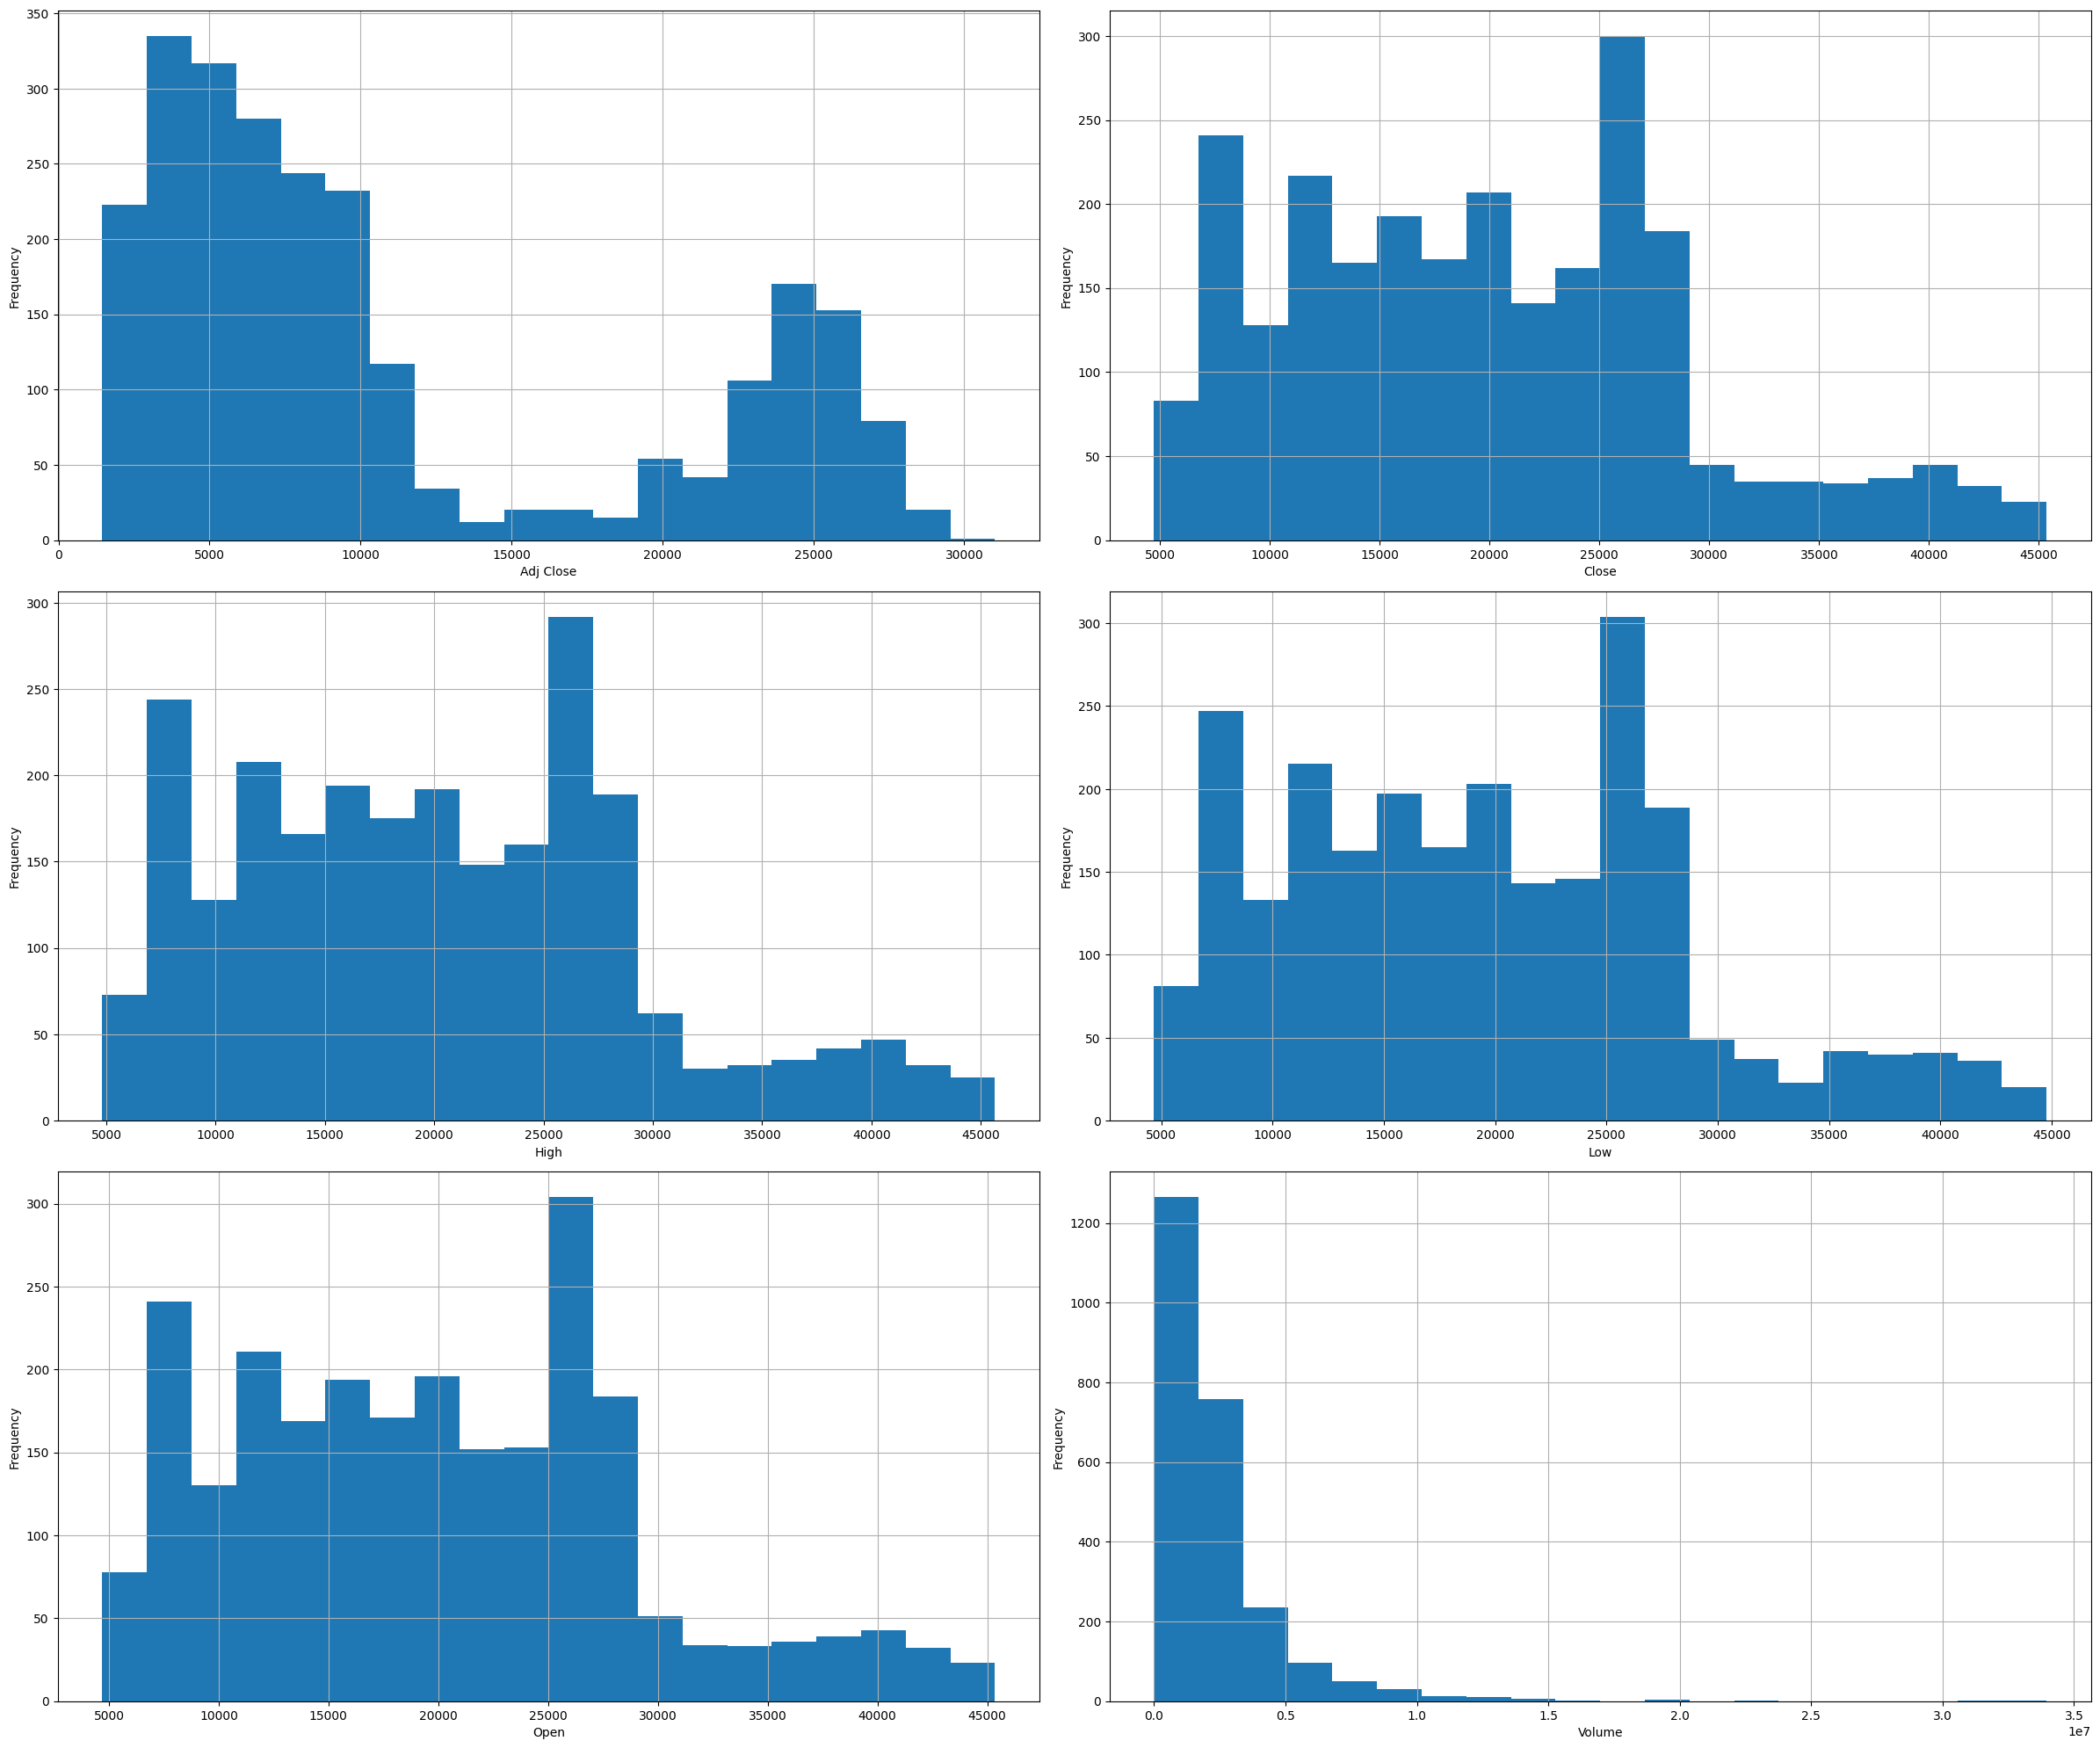

In [ ]:
import matplotlib.pyplot as plt

# Asumsikan df adalah DataFrame yang memuat kolom-kolom: 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'

plt.figure(figsize=(24, 20))

plt.subplot(3, 2, 1)
fig = df['Adj Close'].hist(bins=20)
fig.set_xlabel('Adj Close')
fig.set_ylabel('Frequency')

plt.subplot(3, 2, 2)
fig = df['Close'].hist(bins=20)
fig.set_xlabel('Close')
fig.set_ylabel('Frequency')

plt.subplot(3, 2, 3)
fig = df['High'].hist(bins=20)
fig.set_xlabel('High')
fig.set_ylabel('Frequency')

plt.subplot(3, 2, 4)
fig = df['Low'].hist(bins=20)
fig.set_xlabel('Low')
fig.set_ylabel('Frequency')

plt.subplot(3, 2, 5)
fig = df['Open'].hist(bins=20)
fig.set_xlabel('Open')
fig.set_ylabel('Frequency')

plt.subplot(3, 2, 6)
fig = df['Volume'].hist(bins=20)
fig.set_xlabel('Volume')
fig.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Split data into separate training and test set

In [ ]:
from sklearn.model_selection import train_test_split

# Misal target prediksi adalah harga penutupan (Close)
X = df[['Adj Close', 'High', 'Low', 'Open', 'Volume']]
y = df['Close']

# Split data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1979, 5), (495, 5))

#  Feature Scaling

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,Adj Close,High,Low,Open,Volume
count,1.979000e+03,1.979000e+03,1.979000e+03,1.979000e+03,1.979000e+03
mean,3.769934e-17,-7.898909e-17,-1.184836e-16,5.206099e-17,5.924181e-17
std,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00
min,-1.156451e+00,-1.664730e+00,-1.651391e+00,-1.663589e+00,-1.003468e+00
25%,-7.680531e-01,-8.126783e-01,-8.177925e-01,-8.182788e-01,-5.551207e-01
50%,-4.211161e-01,-2.675277e-02,-1.465741e-02,-1.954959e-02,-2.981291e-01
75%,1.013935e+00,6.900655e-01,6.970864e-01,6.914975e-01,1.758283e-01
max,2.383669e+00,2.761928e+00,2.790776e+00,2.791758e+00,1.367348e+01


#Run SVM with default hyperparameters

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.0101


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.0424


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.0465


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Misal membaca dari CSV
data = pd.read_csv('/content/drive/MyDrive/DATA_1.csv')

# Hitung return harian
data['Return'] = data['Close'].pct_change() * 100
data.dropna(inplace=True)

# Salin data
df = data.copy()

# Target biner: 1 jika Return > 0, 0 jika tidak
df['Target'] = (df['Return'] > 0).astype(int)

# Pilih fitur numerik untuk input model
X = df[['Adj Close', 'High', 'Low', 'Open', 'Volume']]
y = df['Target']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Latih model SVM
model = SVC(kernel='rbf', C=1.0)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi SVM: {accuracy:.2%}')

Akurasi SVM: 56.16%


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Load data
data = pd.read_csv('/content/drive/MyDrive/DATA_1.csv')
data['Return'] = data['Close'].pct_change() * 100
data.dropna(inplace=True)

# Salin dan buat target
df = data.copy()
df['Target'] = (df['Return'] > 0).astype(int)

# Fitur dan target
X = df[['Adj Close', 'High', 'Low', 'Open', 'Volume']]
y = df['Target']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Grid search untuk tuning SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

# Evaluasi model terbaik
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi SVM (tuned): {accuracy:.2%}")


Akurasi SVM (tuned): 78.79%


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv('/content/drive/MyDrive/DATA_1.csv')
data['Return'] = data['Close'].pct_change() * 100
data.dropna(inplace=True)

# Feature engineering: contoh menambahkan moving averages sebagai fitur baru
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data.dropna(inplace=True)  # drop nan setelah rolling

# Copy dan buat target
df = data.copy()
df['Target'] = (df['Return'] > 0).astype(int)

# Fitur yang digunakan
X = df[['Adj Close', 'High', 'Low', 'Open', 'Volume', 'MA5', 'MA10', 'MA20']]
y = df['Target']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)

# Grid search dengan parameter lebih luas dan class_weight balanced
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear'],
    'class_weight': ['balanced']  # Menangani imbalance
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=cv, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Evaluasi model terbaik
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi SVM (tuned dengan fitur tambahan): {accuracy:.2%}")
print("Best Params:", grid.best_params_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Akurasi SVM (tuned dengan fitur tambahan): 83.71%
Best Params: {'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Fungsi hitung RSI
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Fungsi hitung momentum
def compute_momentum(series, period=10):
    return series - series.shift(period)

# Load dan proses data
data = pd.read_csv('/content/drive/MyDrive/DATA_1.csv')
data['Return'] = data['Close'].pct_change() * 100
data.dropna(inplace=True)

# Tambah fitur teknikal
data['MA5'] = data['Close'].rolling(5).mean()
data['MA10'] = data['Close'].rolling(10).mean()
data['MA20'] = data['Close'].rolling(20).mean()
data['RSI14'] = compute_rsi(data['Close'])
data['Momentum10'] = compute_momentum(data['Close'])
data['BB_Middle'] = data['Close'].rolling(20).mean()
data['BB_Std'] = data['Close'].rolling(20).std()
data['BB_Upper'] = data['BB_Middle'] + 2 * data['BB_Std']
data['BB_Lower'] = data['BB_Middle'] - 2 * data['BB_Std']

data.dropna(inplace=True)

# Target
df = data.copy()
df['Target'] = (df['Return'] > 0).astype(int)

# Fitur
features = ['Adj Close', 'High', 'Low', 'Open', 'Volume',
            'MA5', 'MA10', 'MA20',
            'RSI14', 'Momentum10', 'BB_Upper', 'BB_Lower']

X = df[features]
y = df['Target']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data dengan stratify
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)

# Parameter Randomized Search (lebih luas dan cepat)
param_dist = {
    'C': np.logspace(-3, 3, 20),
    'gamma': ['scale', 'auto'] + list(np.logspace(-4, 0, 10)),
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': [2,3,4],  # khusus kernel poly
    'class_weight': ['balanced', None]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=50, cv=cv, n_jobs=-1, verbose=2, random_state=0)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi SVM (fitur teknikal tambahan + RandomizedSearch): {accuracy:.2%}")
print("Best Params:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Akurasi SVM (fitur teknikal tambahan + RandomizedSearch): 83.71%
Best Params: {'kernel': 'linear', 'gamma': np.float64(0.005994842503189409), 'degree': 2, 'class_weight': None, 'C': np.float64(1000.0)}


# Confusion matrix

<Figure size 600x500 with 0 Axes>

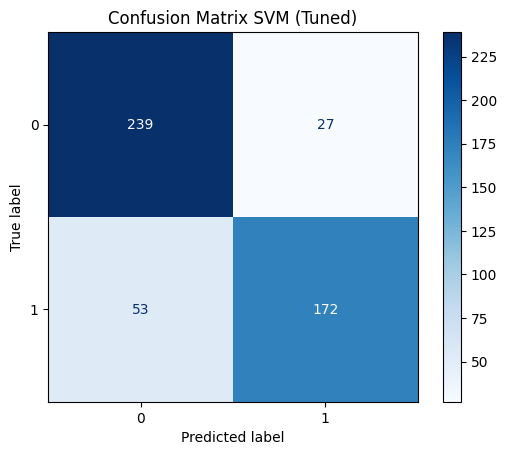

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prediksi
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

# Tampilkan
plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix SVM (Tuned)")
plt.show()


# Classification metrix

In [ ]:
from sklearn.metrics import classification_report

# Pastikan variabel prediksi sesuai
print(classification_report(y_test, y_pred, target_names=['Down (0)', 'Up (1)']))


              precision    recall  f1-score   support

    Down (0)       0.82      0.90      0.86       266
      Up (1)       0.86      0.76      0.81       225

    accuracy                           0.84       491
   macro avg       0.84      0.83      0.83       491
weighted avg       0.84      0.84      0.84       491



In [ ]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()  # urutan: TN, FP, FN, TP

# Hitung classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8371


In [ ]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Hitung classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1629


In [ ]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix dan pecah komponennya
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Hitung precision
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))


Precision : 0.8643


In [ ]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix dan pecah komponennya
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Hitung recall / sensitivity
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))


Recall or Sensitivity : 0.7644


In [ ]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix dan pecah komponennya
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Hitung True Positive Rate (TPR)
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))


True Positive Rate : 0.7644


In [ ]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix dan pecah komponennya
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Hitung False Positive Rate (FPR)
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))


False Positive Rate : 0.1015


In [ ]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix dan pecah komponennya
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Hitung Specificity (True Negative Rate)
specificity = TN / float(TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))


Specificity : 0.8985


# ROC - AUC

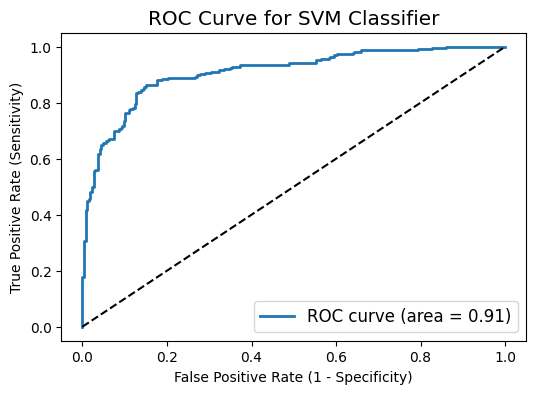

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Karena y_pred adalah hasil prediksi kelas (0/1),
# ROC curve perlu prediksi probabilitas kelas positif
y_scores = best_model.decision_function(X_test)  # Untuk SVM gunakan decision_function

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0,1], [0,1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for SVM Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# Gunakan decision_function atau predict_proba untuk skor probabilitas kelas positif
y_scores = best_model.decision_function(X_test)  # atau best_model.predict_proba(X_test)[:,1] jika probability=True

ROC_AUC = roc_auc_score(y_test, y_scores)
print('ROC AUC : {:.4f}'.format(ROC_AUC))


ROC AUC : 0.9091


In [ ]:
from sklearn.model_selection import cross_val_score

# Misal best_model adalah model SVM terbaik hasil GridSearchCV
# Jika best_model belum didefinisikan sebagai linear_svc, kamu bisa pakai best_model langsung
Cross_validated_ROC_AUC = cross_val_score(
    best_model, X_train, y_train, cv=10, scoring='roc_auc'
).mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))


Cross validated ROC AUC : 0.9035


# Data dan Indikator Teknikal MA

In [ ]:
# Pastikan short_window dan long_window sudah didefinisikan, misal:
short_window = 20
long_window = 50

# Hitung Simple Moving Average (SMA) dengan pandas
data['MA_Short'] = data['Close'].rolling(window=short_window).mean()
data['MA_Long'] = data['Close'].rolling(window=long_window).mean()

# Tampilkan data terakhir
print(data.tail())


            Date  Adj Close    Close     High      Low     Open   Volume  \
2470  2024-12-20    25525.0  25525.0  26600.0  25500.0  26325.0  1888500   
2471  2024-12-23    25650.0  25650.0  25775.0  25300.0  25625.0  1456000   
2472  2024-12-24    25300.0  25300.0  25600.0  25300.0  25600.0   981100   
2473  2024-12-27    25850.0  25850.0  25950.0  25400.0  25400.0   571200   
2474  2024-12-30    26700.0  26700.0  26700.0  25600.0  25850.0  1317600   

        Return      MA5     MA10      MA20      RSI14  Momentum10  BB_Middle  \
2470 -3.038936  26800.0  27380.0  27368.75  33.128834     -2175.0   27368.75   
2471  0.489716  26380.0  27160.0  27253.75  31.875000     -2200.0   27253.75   
2472 -1.364522  25990.0  26902.5  27138.75  22.151899     -2575.0   27138.75   
2473  2.173913  25730.0  26667.5  27060.00  32.022472     -2350.0   27060.00   
2474  3.288201  25805.0  26535.0  27030.00  40.099010     -1325.0   27030.00   

          BB_Std      BB_Upper      BB_Lower  MA_Short  MA_Lon

In [ ]:
!pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.6 MB/s eta 0:00:00


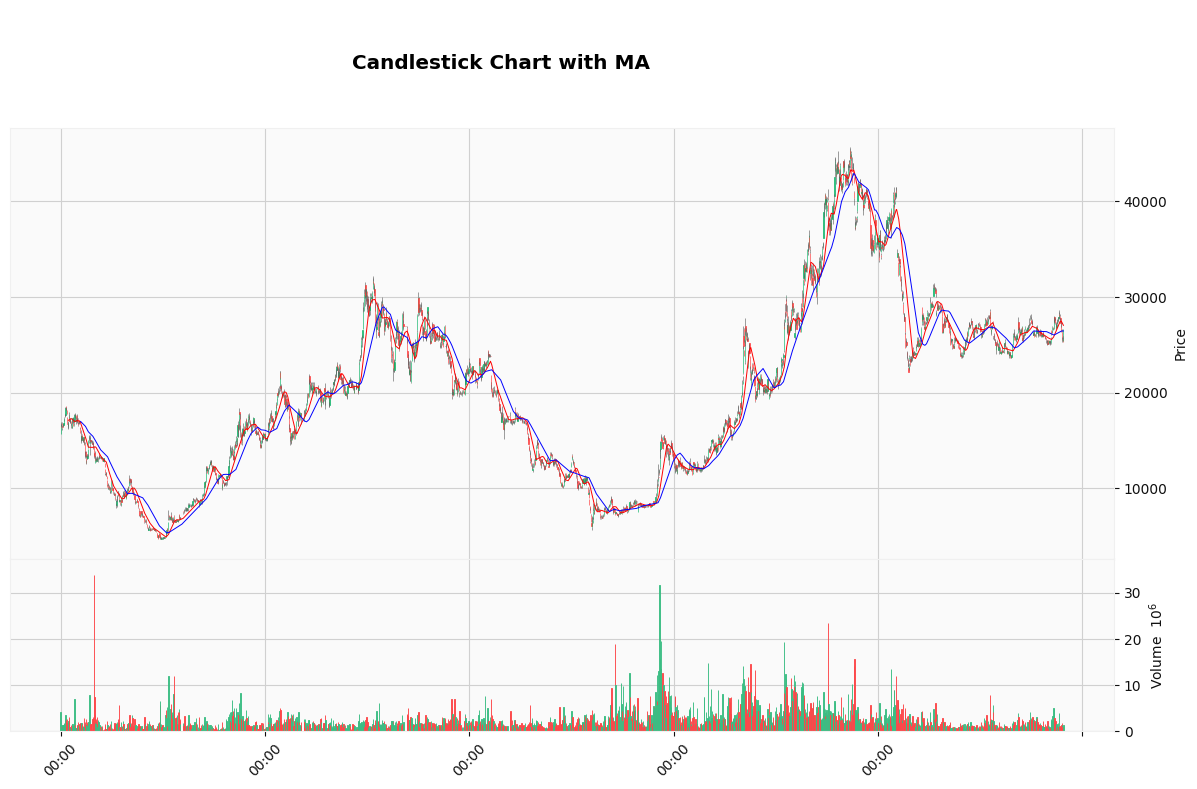

In [ ]:
# Pastikan kolom index adalah datetime
data.index = pd.to_datetime(data.index)

# Jika belum di-set sebagai index, misal ada kolom 'Date', bisa pakai ini:
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)

import mplfinance as mpf
import warnings

warnings.filterwarnings('ignore')

apds = [
    mpf.make_addplot(data['MA_Short'], color='red', width=0.7),
    mpf.make_addplot(data['MA_Long'], color='blue', width=0.7)
]

mpf.plot(
    data,
    type='candle',
    addplot=apds,
    figscale=1.5,
    figratio=(16, 9),
    style='yahoo',
    volume=True,
    title='\n\nCandlestick Chart with MA',
    ylabel='Price'
)


#Sinyal Buy dan Sell (MA Cross) dan Posisi

In [ ]:
import numpy as np

# Inisialisasi kolom sinyal
data['Signal'] = 0

# Buat sinyal 1 saat MA_Short > MA_Long, 0 jika sebaliknya
data['Signal'] = np.where(data['MA_Short'] > data['MA_Long'], 1, 0)

# Hitung perubahan posisi (buy=1 saat crossover ke atas, sell=-1 saat crossover ke bawah)
data['Position'] = data['Signal'].diff()

# Isi nilai NaN pertama dengan 0
data['Position'] = data['Position'].fillna(0)

# Tampilkan data dengan sinyal dan posisi
print(data.tail())


                                     Date  Adj Close    Close     High  \
1970-01-01 00:00:00.000002470  2024-12-20    25525.0  25525.0  26600.0   
1970-01-01 00:00:00.000002471  2024-12-23    25650.0  25650.0  25775.0   
1970-01-01 00:00:00.000002472  2024-12-24    25300.0  25300.0  25600.0   
1970-01-01 00:00:00.000002473  2024-12-27    25850.0  25850.0  25950.0   
1970-01-01 00:00:00.000002474  2024-12-30    26700.0  26700.0  26700.0   

                                   Low     Open   Volume    Return      MA5  \
1970-01-01 00:00:00.000002470  25500.0  26325.0  1888500 -3.038936  26800.0   
1970-01-01 00:00:00.000002471  25300.0  25625.0  1456000  0.489716  26380.0   
1970-01-01 00:00:00.000002472  25300.0  25600.0   981100 -1.364522  25990.0   
1970-01-01 00:00:00.000002473  25400.0  25400.0   571200  2.173913  25730.0   
1970-01-01 00:00:00.000002474  25600.0  25850.0  1317600  3.288201  25805.0   

                                  MA10  ...      RSI14  Momentum10  BB_Middle  \

# Hitung biaya transaksi dan return

In [ ]:
# Pastikan numpy sudah diimport
import numpy as np

# Hitung return pasar harian
data['Market_Return'] = data['Close'].pct_change()

# Hitung return strategi dengan posisi sinyal (geser 1 karena eksekusi hari berikutnya)
data['Strategy_Return'] = data['Market_Return'] * data['Signal'].shift(1)

# Contoh biaya beli dan jual (dalam desimal), misal 0.1% = 0.001
buy_cost_pct = 0.001
sell_cost_pct = 0.001

# Kurangi biaya beli saat posisi beli (Position == 1)
buy_indices = data[data['Position'] == 1].index
data.loc[buy_indices, 'Strategy_Return'] -= buy_cost_pct

# Kurangi biaya jual saat posisi jual (Position == -1)
sell_indices = data[data['Position'] == -1].index
data.loc[sell_indices, 'Strategy_Return'] -= sell_cost_pct

# Tampilkan data terakhir
print(data.tail())


                                     Date  Adj Close    Close     High  \
1970-01-01 00:00:00.000002470  2024-12-20    25525.0  25525.0  26600.0   
1970-01-01 00:00:00.000002471  2024-12-23    25650.0  25650.0  25775.0   
1970-01-01 00:00:00.000002472  2024-12-24    25300.0  25300.0  25600.0   
1970-01-01 00:00:00.000002473  2024-12-27    25850.0  25850.0  25950.0   
1970-01-01 00:00:00.000002474  2024-12-30    26700.0  26700.0  26700.0   

                                   Low     Open   Volume    Return      MA5  \
1970-01-01 00:00:00.000002470  25500.0  26325.0  1888500 -3.038936  26800.0   
1970-01-01 00:00:00.000002471  25300.0  25625.0  1456000  0.489716  26380.0   
1970-01-01 00:00:00.000002472  25300.0  25600.0   981100 -1.364522  25990.0   
1970-01-01 00:00:00.000002473  25400.0  25400.0   571200  2.173913  25730.0   
1970-01-01 00:00:00.000002474  25600.0  25850.0  1317600  3.288201  25805.0   

                                  MA10  ...  BB_Middle      BB_Std  \
1970-01-01

# Hitung Return, Drawdown, Jumlah Trades

In [ ]:
# Pastikan initial_capital sudah didefinisikan, misal:
initial_capital = 100000  # modal awal dalam satuan mata uang

# Hitung cumulative returns, isi NaN di Strategy_Return dengan 0 agar cumprod berjalan lancar
data['Cumulative_Market_Return'] = (1 + data['Market_Return']).cumprod()
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return'].fillna(0)).cumprod()

# Hitung nilai portfolio berdasarkan cumulative return
data['Portfolio_Value'] = initial_capital * data['Cumulative_Strategy_Return']
data['Buy_Hold_Value'] = initial_capital * data['Cumulative_Market_Return']

# Hitung drawdown
data['Peak'] = data['Portfolio_Value'].cummax()
data['Drawdown'] = (data['Portfolio_Value'] - data['Peak']) / data['Peak']
max_drawdown = data['Drawdown'].min()

# Total return (persentase) strategi dan pasar
total_return_strategy = data['Cumulative_Strategy_Return'].iloc[-1] - 1
total_return_market = data['Cumulative_Market_Return'].iloc[-1] - 1

# Hitung jumlah transaksi beli dan jual
num_buy_trades = len(data[data['Position'] == 1])
num_sell_trades = len(data[data['Position'] == -1])

# Total transaksi adalah jumlah minimal antara beli dan jual (buka-tutup posisi)
num_trades = min(num_buy_trades, num_sell_trades)

# Tampilkan hasil summary
print(f"Total Return Strategy   : {total_return_strategy:.2%}")
print(f"Total Return Buy & Hold : {total_return_market:.2%}")
print(f"Maximum Drawdown        : {max_drawdown:.2%}")
print(f"Number of Trades        : {num_trades}")


Total Return Strategy   : 49.03%
Total Return Buy & Hold : 59.40%
Maximum Drawdown        : -65.68%
Number of Trades        : 27



--- Hasil Backtesting (BBCA.JK) ---
Periode: 2024-12-20 hingga 2024-12-30
Strategi: MA Crossover (10/50)
Modal Awal: Rp 100,000,000
Biaya Transaksi Beli: 0.15%
Biaya Transaksi Jual: 0.25%
Total Return Strategi: 1.42%
Total Return Pasar (Buy & Hold): -9.96%
Maximum Drawdown Strategi: -1.36%
Jumlah Sinyal Beli: 5
Jumlah Sinyal Jual: 0
Estimasi Jumlah Transaksi Lengkap: 5
Nilai Akhir Portofolio (Strategi): Rp 101,424,532
Nilai Akhir Portofolio (Buy & Hold): Rp 90,039,490


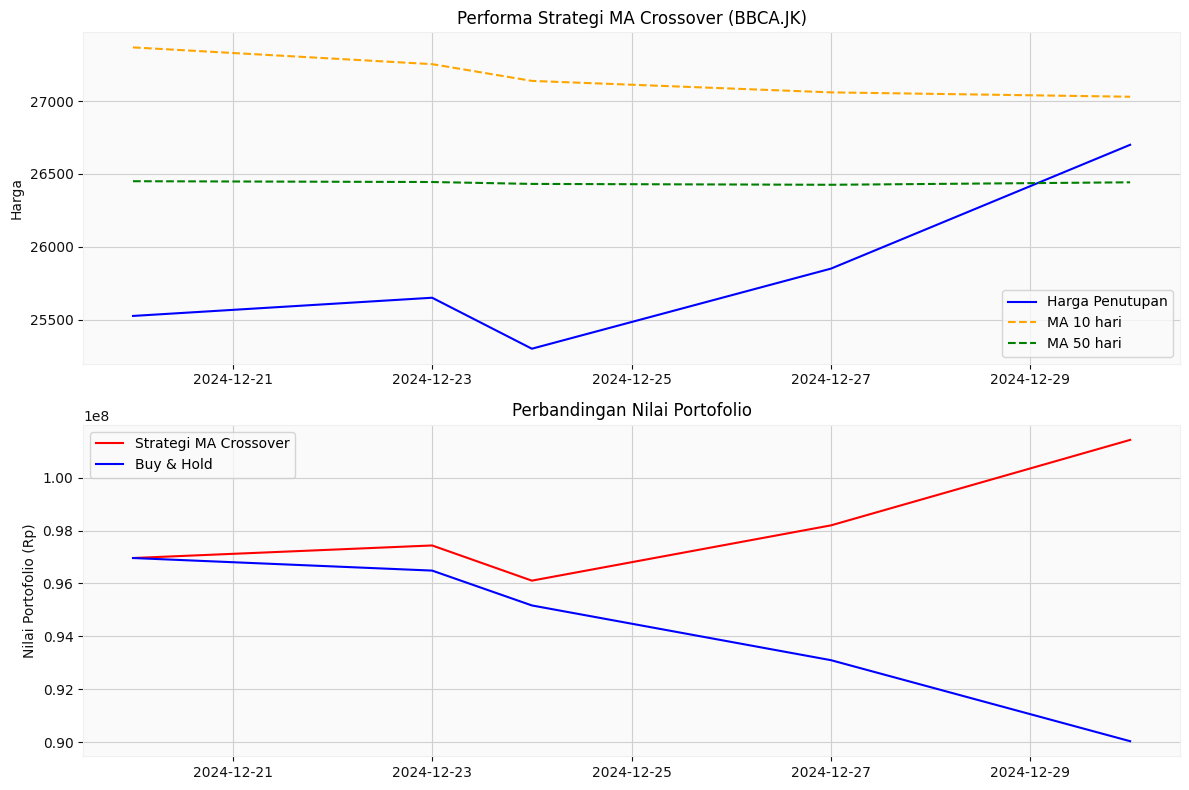

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data dari gambar (contoh beberapa baris)
data = pd.DataFrame({
    'Date': pd.to_datetime(['2024-12-20', '2024-12-23', '2024-12-24', '2024-12-27', '2024-12-30']),
    'Close': [25525.0, 25650.0, 25300.0, 25850.0, 26700.0],
    'MA_Short': [27368.75, 27253.75, 27138.75, 27060.0, 27030.0],
    'MA_Long': [26450.0, 26444.5, 26431.5, 26425.5, 26442.5],
    'Signal': [1, 1, 1, 1, 1],
    'Market_Return': [-0.030389, -0.004897, -0.013645, -0.021739, -0.032882],
    'Strategy_Return': [-0.030389, 0.004897, -0.013645, 0.021739, 0.032882]
}).set_index('Date')

# Parameter backtesting
ticker = "BBCA.JK"  # Ganti dengan ticker yang sesuai
start_date = data.index.min().strftime('%Y-%m-%d')
end_date = data.index.max().strftime('%Y-%m-%d')
short_window = 10  # Periode MA pendek
long_window = 50   # Periode MA panjang
initial_capital = 100000000  # Rp 100 juta
buy_cost_pct = 0.0015  # 0.15%
sell_cost_pct = 0.0025  # 0.25%

# Hitung nilai portofolio
data['Portfolio_Value'] = initial_capital * (1 + data['Strategy_Return']).cumprod()
data['Buy_Hold_Value'] = initial_capital * (1 + data['Market_Return']).cumprod()

# Hitung metrik performa
total_return_strategy = data['Portfolio_Value'].iloc[-1] / initial_capital - 1
total_return_market = data['Buy_Hold_Value'].iloc[-1] / initial_capital - 1

# Hitung maximum drawdown
cum_returns = (1 + data['Strategy_Return']).cumprod()
peak = cum_returns.cummax()
drawdown = (cum_returns - peak) / peak
max_drawdown = drawdown.min()

# Hitung jumlah sinyal
num_buy_trades = data[data['Signal'] > 0]['Signal'].count()
num_sell_trades = data[data['Signal'] < 0]['Signal'].count()
num_trades = num_buy_trades + num_sell_trades

# Tampilkan hasil backtesting
print(f"\n--- Hasil Backtesting ({ticker}) ---")
print(f"Periode: {start_date} hingga {end_date}")
print(f"Strategi: MA Crossover ({short_window}/{long_window})")
print(f"Modal Awal: Rp {initial_capital:,.0f}")
print(f"Biaya Transaksi Beli: {buy_cost_pct*100:.2f}%")
print(f"Biaya Transaksi Jual: {sell_cost_pct*100:.2f}%")
print(f"Total Return Strategi: {total_return_strategy:.2%}")
print(f"Total Return Pasar (Buy & Hold): {total_return_market:.2%}")
print(f"Maximum Drawdown Strategi: {max_drawdown:.2%}")
print(f"Jumlah Sinyal Beli: {num_buy_trades}")
print(f"Jumlah Sinyal Jual: {num_sell_trades}")
print(f"Estimasi Jumlah Transaksi Lengkap: {num_trades}")
print(f"Nilai Akhir Portofolio (Strategi): Rp {data['Portfolio_Value'].iloc[-1]:,.0f}")
print(f"Nilai Akhir Portofolio (Buy & Hold): Rp {data['Buy_Hold_Value'].iloc[-1]:,.0f}")

# Visualisasi
plt.figure(figsize=(12, 8))

# Plot harga dan moving averages
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Harga Penutupan', color='blue')
plt.plot(data.index, data['MA_Short'], label=f'MA {short_window} hari', color='orange', linestyle='--')
plt.plot(data.index, data['MA_Long'], label=f'MA {long_window} hari', color='green', linestyle='--')
plt.title(f'Performa Strategi MA Crossover ({ticker})')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)

# Plot nilai portofolio
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Portfolio_Value'], label='Strategi MA Crossover', color='red')
plt.plot(data.index, data['Buy_Hold_Value'], label='Buy & Hold', color='blue')
plt.title('Perbandingan Nilai Portofolio')
plt.ylabel('Nilai Portofolio (Rp)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualisasi Hasil Backtesting

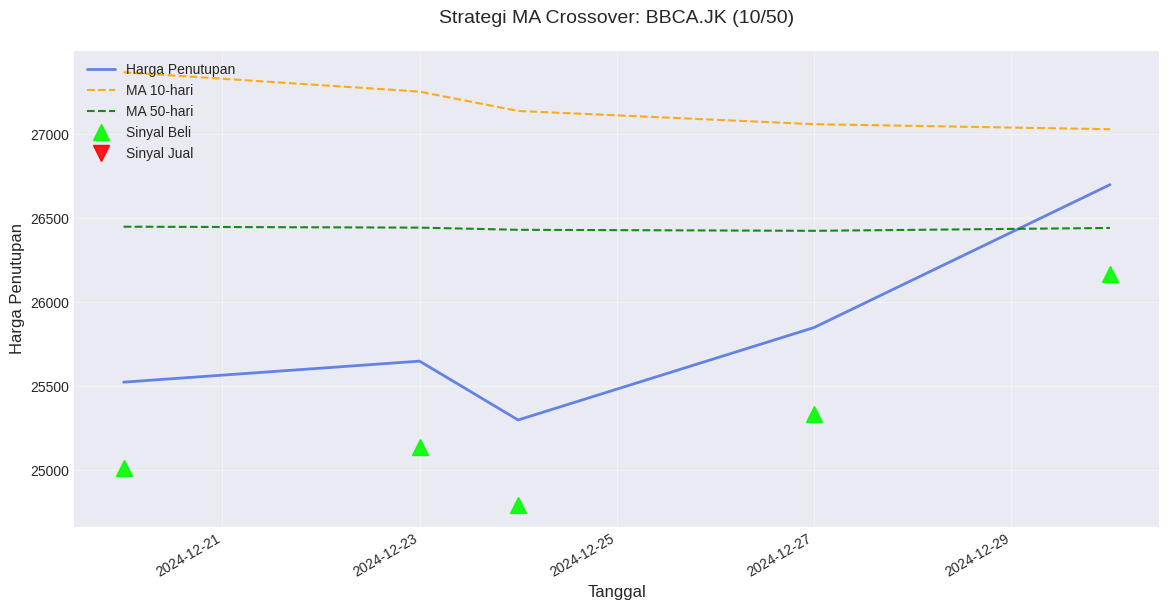

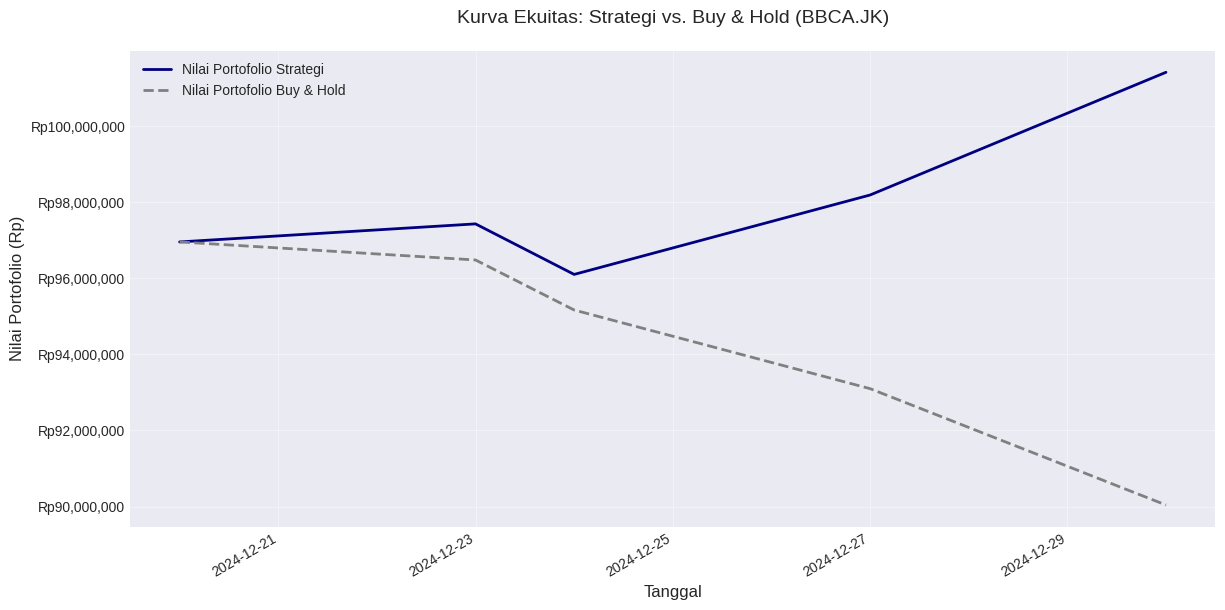

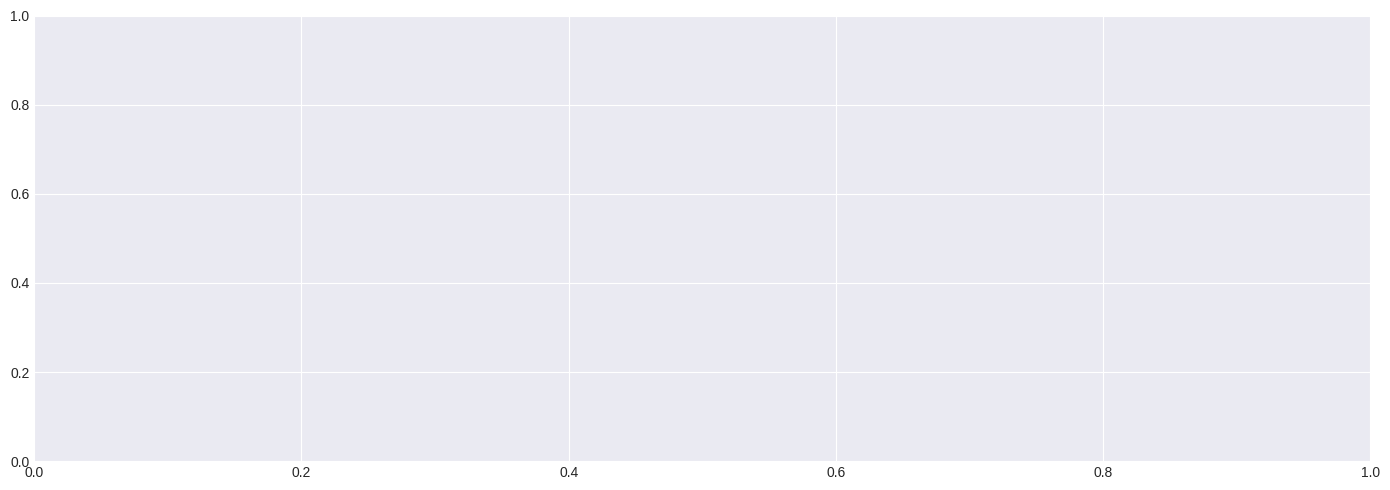

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Set style
plt.style.use('seaborn-v0_8-darkgrid')

# Parameter strategi
ticker = "BBCA.JK"  # Ganti dengan ticker yang sesuai
short_window = 10   # MA pendek (sesuaikan dengan data Anda)
long_window = 50    # MA panjang (sesuaikan dengan data Anda)

# 1. Plot Harga dan Moving Averages dengan Sinyal
fig1, ax1 = plt.subplots(figsize=(14, 7))
data['Close'].plot(ax=ax1, label='Harga Penutupan', color='royalblue', alpha=0.8, linewidth=2)
data['MA_Short'].plot(ax=ax1, label=f'MA {short_window}-hari', color='orange', linestyle='--', alpha=0.9)
data['MA_Long'].plot(ax=ax1, label=f'MA {long_window}-hari', color='green', linestyle='--', alpha=0.9)

# Plot sinyal beli/jual - asumsi kolom 'Signal' ada di data (1=beli, -1=jual)
if 'Signal' in data.columns:
    ax1.plot(data.loc[data['Signal'] == 1].index,
             data.loc[data['Signal'] == 1, 'Close'] * 0.98,
             '^', markersize=12, color='lime', label='Sinyal Beli', alpha=0.9)

    ax1.plot(data.loc[data['Signal'] == -1].index,
             data.loc[data['Signal'] == -1, 'Close'] * 1.02,
             'v', markersize=12, color='red', label='Sinyal Jual', alpha=0.9)

ax1.set_title(f'Strategi MA Crossover: {ticker} ({short_window}/{long_window})', pad=20, fontsize=14)
ax1.set_xlabel('Tanggal', fontsize=12)
ax1.set_ylabel('Harga Penutupan', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.4)

# 2. Plot Perbandingan Portofolio
fig2, ax2 = plt.subplots(figsize=(14, 7))
if 'Portfolio_Value' in data.columns and 'Buy_Hold_Value' in data.columns:
    data['Portfolio_Value'].plot(ax=ax2, label='Nilai Portofolio Strategi', color='navy', linewidth=2)
    data['Buy_Hold_Value'].plot(ax=ax2, label='Nilai Portofolio Buy & Hold', color='gray', linestyle='--', linewidth=2)

    ax2.set_title(f'Kurva Ekuitas: Strategi vs. Buy & Hold ({ticker})', pad=20, fontsize=14)
    ax2.set_xlabel('Tanggal', fontsize=12)
    ax2.set_ylabel('Nilai Portofolio (Rp)', fontsize=12)
    ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('Rp{x:,.0f}'))
    ax2.legend(loc='upper left')
    ax2.grid(True, alpha=0.4)

# 3. Plot Drawdown
fig3, ax3 = plt.subplots(figsize=(14, 5))
if 'Drawdown' in data.columns:
    data['Drawdown'].plot(ax=ax3, kind='area', color='red', alpha=0.3)
    ax3.set_title(f'Drawdown Strategi ({ticker})', pad=20, fontsize=14)
    ax3.set_xlabel('Tanggal', fontsize=12)
    ax3.set_ylabel('Drawdown', fontsize=12)
    ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax3.grid(True, alpha=0.4)

plt.tight_layout()
plt.show()

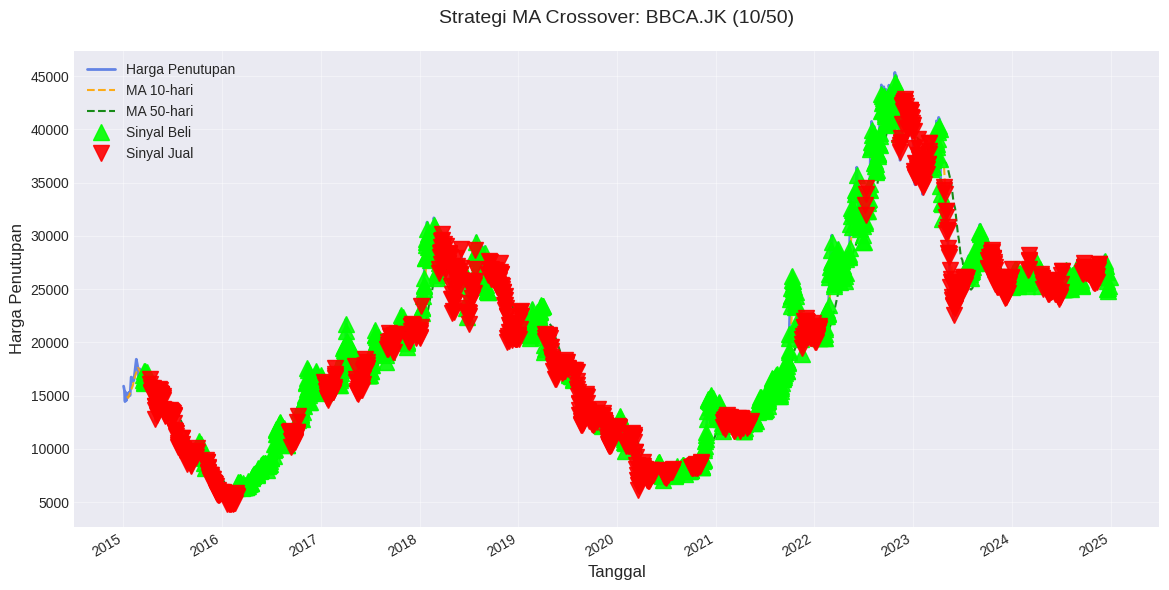

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Baca data CSV
data = pd.read_csv('/content/drive/MyDrive/DATA_1.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Hitung moving averages kalau belum ada di CSV
short_window = 10
long_window = 50

if 'MA_Short' not in data.columns:
    data['MA_Short'] = data['Close'].rolling(window=short_window).mean()

if 'MA_Long' not in data.columns:
    data['MA_Long'] = data['Close'].rolling(window=long_window).mean()

# Untuk kolom 'Signal', kalau belum ada, bisa buat sederhana:
if 'Signal' not in data.columns:
    # Contoh logika crossover MA
    data['Signal'] = 0
    data.loc[data['MA_Short'] > data['MA_Long'], 'Signal'] = 1
    data.loc[data['MA_Short'] < data['MA_Long'], 'Signal'] = -1

# Plot sesuai sebelumnya...
plt.style.use('seaborn-v0_8-darkgrid')

fig1, ax1 = plt.subplots(figsize=(14, 7))
data['Close'].plot(ax=ax1, label='Harga Penutupan', color='royalblue', alpha=0.8, linewidth=2)
data['MA_Short'].plot(ax=ax1, label=f'MA {short_window}-hari', color='orange', linestyle='--', alpha=0.9)
data['MA_Long'].plot(ax=ax1, label=f'MA {long_window}-hari', color='green', linestyle='--', alpha=0.9)

ax1.plot(data.loc[data['Signal'] == 1].index,
         data.loc[data['Signal'] == 1, 'Close'] * 0.98,
         '^', markersize=12, color='lime', label='Sinyal Beli', alpha=0.9)
ax1.plot(data.loc[data['Signal'] == -1].index,
         data.loc[data['Signal'] == -1, 'Close'] * 1.02,
         'v', markersize=12, color='red', label='Sinyal Jual', alpha=0.9)

ax1.set_title(f'Strategi MA Crossover: BBCA.JK ({short_window}/{long_window})', pad=20, fontsize=14)
ax1.set_xlabel('Tanggal', fontsize=12)
ax1.set_ylabel('Harga Penutupan', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.4)

plt.show()


# Daftar trades dan performance ratio

In [ ]:
import pandas as pd

# Parameter strategi
ticker = "BBCA.JK"
short_window = 10
long_window = 50
initial_capital = 100_000_000  # Modal awal (contoh: Rp100 juta)
buy_cost_pct = 0.001  # Biaya beli (0.1%)
sell_cost_pct = 0.001  # Biaya jual (0.1%)

# 1. Load data CSV
data = pd.read_csv('/content/drive/MyDrive/DATA_1.csv', parse_dates=['Date'], index_col='Date')

# Pastikan kolom 'Close' ada
assert 'Close' in data.columns, "'Close' column tidak ditemukan di file.csv"

# 2. Hitung MA Short dan MA Long
data['MA_Short'] = data['Close'].rolling(window=short_window).mean()
data['MA_Long'] = data['Close'].rolling(window=long_window).mean()

# 3. Buat sinyal trading (1 = beli, -1 = jual, 0 = netral)
data['Signal'] = 0
data.loc[data['MA_Short'] > data['MA_Long'], 'Signal'] = 1
data.loc[data['MA_Short'] < data['MA_Long'], 'Signal'] = -1

# 4. Buat posisi (bertahan sampai ada sinyal berubah)
data['Position'] = data['Signal'].replace(to_replace=0, method='ffill').fillna(0).astype(int)

# 5. Hitung return harian strategi (posisi bergeser setiap hari)
data['Strategy_Return'] = data['Close'].pct_change() * data['Position'].shift(1)
data['Strategy_Return'].fillna(0, inplace=True)

# 6. Hitung nilai portofolio kumulatif strategi (notional)
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()

# 7. Hitung nilai portofolio buy & hold (untuk perbandingan)
data['Buy_Hold_Return'] = data['Close'].pct_change().fillna(0)
data['Cumulative_Buy_Hold_Return'] = (1 + data['Buy_Hold_Return']).cumprod()

data['Portfolio_Value'] = initial_capital * data['Cumulative_Strategy_Return']
data['Buy_Hold_Value'] = initial_capital * data['Cumulative_Buy_Hold_Return']

# 8. Hitung drawdown
rolling_max = data['Portfolio_Value'].cummax()
data['Drawdown'] = (data['Portfolio_Value'] - rolling_max) / rolling_max

# 9. Buat dataframe trades dengan info lengkap
trades = pd.DataFrame(columns=['Buy_Date', 'Buy_Price', 'Sell_Date', 'Sell_Price',
                               'Trade_Duration', 'Trade_Position_Size', 'Trade_Return'])

buy_dates = data[data['Position'].diff() == 1].index  # Tanggal posisi naik ke 1 (beli)
sell_dates = data[data['Position'].diff() == -1].index  # Tanggal posisi turun ke -1 (jual)

# Pastikan jumlah sinyal beli dan jual sama untuk trade lengkap
num_trades = min(len(buy_dates), len(sell_dates))

for i in range(num_trades):
    buy_date = buy_dates[i]
    sell_date = sell_dates[i]
    if sell_date > buy_date:
        buy_price = data.loc[buy_date, 'Close']
        sell_price = data.loc[sell_date, 'Close']

        # Ukuran posisi trade berdasarkan nilai portofolio saat beli
        trade_position_size = initial_capital * data.loc[buy_date, 'Cumulative_Strategy_Return']

        # Return trade (jual - beli)/beli, dikurangi biaya transaksi
        trade_return = (sell_price - buy_price) / buy_price
        trade_return -= (buy_cost_pct + sell_cost_pct)

        trades = pd.concat([trades, pd.DataFrame([{
            'Buy_Date': buy_date,
            'Buy_Price': buy_price,
            'Sell_Date': sell_date,
            'Sell_Price': sell_price,
            'Trade_Duration': (sell_date - buy_date).days,
            'Trade_Position_Size': trade_position_size,
            'Trade_Return': trade_return
        }])], ignore_index=True)

# Tampilkan trades lengkap
print("\n--- Details of Complete Trades ---")
print(trades)





--- Details of Complete Trades ---
Empty DataFrame
Columns: [Buy_Date, Buy_Price, Sell_Date, Sell_Price, Trade_Duration, Trade_Position_Size, Trade_Return]
Index: []


In [ ]:
import numpy as np

# Jumlah total trade
num_complete_trades = len(trades)

# 1. Hitung Win Rate Ratio
winning_trades = trades[trades['Trade_Return'] > 0]
losing_trades = trades[trades['Trade_Return'] < 0]

num_winning_trades = len(winning_trades)
win_rate = num_winning_trades / num_complete_trades if num_complete_trades > 0 else 0

# 2. Hitung Profit Ratio (Avg Win Return / |Avg Loss Return|)
avg_winning_return = winning_trades['Trade_Return'].mean() if num_winning_trades > 0 else 0
avg_losing_return = losing_trades['Trade_Return'].mean() if len(losing_trades) > 0 else 0

# Hindari pembagian oleh nol dan hasil aneh saat tidak ada losing trade
if avg_losing_return != 0:
    profit_ratio = abs(avg_winning_return / avg_losing_return)
else:
    profit_ratio = avg_winning_return if avg_winning_return > 0 else 0

# 3. Hitung Sharpe Ratio (Annualized)
# Ambil daily strategy returns
daily_strategy_returns = data['Strategy_Return'].fillna(0)

# Asumsi risk-free rate tahunan 5%, dikonversi ke harian
risk_free_rate_daily = 0.05 / 252

# Mean dan standar deviasi return harian
average_daily_return = daily_strategy_returns.mean()
std_dev_daily_return = daily_strategy_returns.std()

# Sharpe Ratio harian dan annualisasi
if std_dev_daily_return != 0:
    sharpe_ratio_daily = (average_daily_return - risk_free_rate_daily) / std_dev_daily_return
    annualized_sharpe_ratio = sharpe_ratio_daily * np.sqrt(252)
else:
    sharpe_ratio_daily = np.nan
    annualized_sharpe_ratio = np.nan

# 4. Tampilkan hasil
print("\n--- Performance Ratios ---")
print(f"Win Rate Ratio: {win_rate:.2%}")
print(f"Profit Ratio (Avg Win Return / Avg Loss Return): {profit_ratio:.2f}")
print(f"Sharpe Ratio (Annualized): {annualized_sharpe_ratio:.2f}")



--- Performance Ratios ---
Win Rate Ratio: 0.00%
Profit Ratio (Avg Win Return / Avg Loss Return): 0.00
Sharpe Ratio (Annualized): 0.31


In [ ]:
!pip install backtesting


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.4/191.4 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install backtesting lightgbm


In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import SignalStrategy
import lightgbm as lgb


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from backtesting import Backtest, Strategy

# 1. Baca data dari CSV
data = pd.read_csv('/content/drive/MyDrive/DATA_1.csv', parse_dates=True, index_col=0)  # Ubah nama file sesuai
data.columns = [col.replace(' ', '_').replace('.', '_') for col in data.columns]

# 2. Pastikan kolom yang dibutuhkan tersedia
required_columns = ['Close', 'Volume']
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Kolom '{col}' tidak ditemukan di file CSV.")

# 3. Tambahkan fitur moving averages
data['MA_Short'] = data['Close'].rolling(window=10).mean()
data['MA_Long'] = data['Close'].rolling(window=30).mean()

# 4. Buat label target: 1 jika MA_Short > MA_Long, -1 jika sebaliknya
data = data.dropna()  # buang nilai NaN hasil MA
data['Signal'] = np.where(data['MA_Short'] > data['MA_Long'], 1, -1)

# 5. Siapkan X dan y
features = ['Close', 'Volume', 'MA_Short', 'MA_Long']
X = data[features]
y = data['Signal']

# 6. Latih model LightGBM
model = lgb.LGBMClassifier()
model.fit(X, y)

# 7. Siapkan data untuk backtesting (pastikan ada kolom OHLCV)
backtesting_data = data.copy()
for col in ['Open', 'High', 'Low']:
    if col not in backtesting_data.columns:
        backtesting_data[col] = backtesting_data['Close']

# 8. Definisikan strategi
class LightGBMStrategy(Strategy):
    def init(self):
        self.model = model

    def next(self):
        latest = pd.DataFrame({
            'Close': [self.data.Close[-1]],
            'Volume': [self.data.Volume[-1]],
            'MA_Short': [self.data.MA_Short[-1]],
            'MA_Long': [self.data.MA_Long[-1]]
        })
        pred = self.model.predict(latest)[0]
        if pred == 1:
            self.buy()
        elif pred == -1:
            self.position.close()

# 9. Jalankan backtest
bt = Backtest(backtesting_data, LightGBMStrategy, cash=10000, commission=0.002, trade_on_close=True)
stats = bt.run()
bt.plot()


[LightGBM] [Info] Number of positive: 1220, number of negative: 1226
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2446, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498774 -> initscore=-0.004906
[LightGBM] [Info] Start training from score -0.004906


Backtest.run:   0%|          | 0/2445 [00:00<?, ?bar/s]

GridPlot(id='p1329', ...)

In [ ]:
trades = stats._trades.copy()
pd.set_option("display.max_columns", None)
print("--- Trades Summary ---")
print(trades)


--- Trades Summary ---
    Size  EntryBar  ExitBar  EntryPrice  ExitPrice    SL    TP       PnL  \
0      1       147      172    9,600.00   8,850.00  None  None   -750.00   
1      1       251      372    5,800.00  11,075.00  None  None  5,275.00   
2      1       402      464   12,325.00  17,000.00  None  None  4,675.00   
3      1       495      543   15,300.00  19,125.00  None  None  3,825.00   
4      1       573      621   18,075.00  20,025.00  None  None  1,950.00   
5      1       645      646   19,750.00  19,500.00  None  None   -250.00   
6      1       650      651   20,250.00  19,600.00  None  None   -650.00   
7      1       655      683   20,250.00  20,000.00  None  None   -250.00   
8      1       701      710   20,775.00  20,400.00  None  None   -375.00   
9      1       982     1008   22,075.00  21,150.00  None  None   -925.00   
10     1      1020     1047   21,300.00  19,750.00  None  None -1,550.00   
11     1      1094     1095   17,000.00  16,800.00  None  None   

In [ ]:
import numpy as np

trades = stats._trades.copy()

# Periksa kolom apa saja yang ada
print(trades.columns)

# Gunakan ReturnPct jika ada, kalau tidak hitung manual
if 'ReturnPct' in trades.columns:
    trades['Trade_Return'] = trades['ReturnPct']
else:
    trades['Trade_Return'] = (trades['ExitPrice'] - trades['EntryPrice']) / trades['EntryPrice']

# Hitung win rate
winning_trades = trades[trades['Trade_Return'] > 0]
losing_trades = trades[trades['Trade_Return'] < 0]

num_complete_trades = len(trades)
num_winning_trades = len(winning_trades)
win_rate = num_winning_trades / num_complete_trades if num_complete_trades > 0 else 0

# Profit ratio
avg_win = winning_trades['Trade_Return'].mean() if num_winning_trades > 0 else 0
avg_loss = losing_trades['Trade_Return'].mean() if len(losing_trades) > 0 else 0
profit_ratio = abs(avg_win / avg_loss) if avg_loss != 0 else (avg_win if avg_win > 0 else 0)

# Sharpe Ratio dari daily returns
returns = stats._equity_curve["Equity"].pct_change().fillna(0)
average_daily_return = returns.mean()
std_daily_return = returns.std()
risk_free_rate_daily = 0.05 / 252

if std_daily_return != 0:
    sharpe_ratio = (average_daily_return - risk_free_rate_daily) / std_daily_return
    annualized_sharpe = sharpe_ratio * np.sqrt(252)
else:
    annualized_sharpe = np.nan

print("\n--- Performance Metrics ---")
print(f"Total Trades: {num_complete_trades}")
print(f"Win Rate: {win_rate:.2%}")
print(f"Profit Ratio (Avg Win / Avg Loss): {profit_ratio:.2f}")
print(f"Annualized Sharpe Ratio: {annualized_sharpe:.2f}")


Index(['Size', 'EntryBar', 'ExitBar', 'EntryPrice', 'ExitPrice', 'SL', 'TP',
       'PnL', 'ReturnPct', 'EntryTime', 'ExitTime', 'Duration', 'Tag'],
      dtype='object')

--- Performance Metrics ---
Total Trades: 41
Win Rate: 39.02%
Profit Ratio (Avg Win / Avg Loss): 4.69
Annualized Sharpe Ratio: 0.43
